In [164]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [166]:
from google.colab import files as f
up=f.upload()

Saving Salary_Data.csv to Salary_Data (1).csv
Saving Problem_statements (1).txt to Problem_statements (1) (1).txt
Saving delivery_time.csv to delivery_time (1).csv


In [167]:
with open("Problem_statements (1).txt","r") as f:
    print(f.read())

1) Delivery_time -> Predict delivery time using sorting time 
2) Salary_hike -> Build a prediction model for Salary_hike

------------------------------------------------------------

Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.




---
# **Prediction model for delivery time**




In [168]:
df=pd.read_csv("delivery_time.csv")
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [169]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [170]:
df.shape

(21, 2)

In [171]:
df.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

<Axes: >

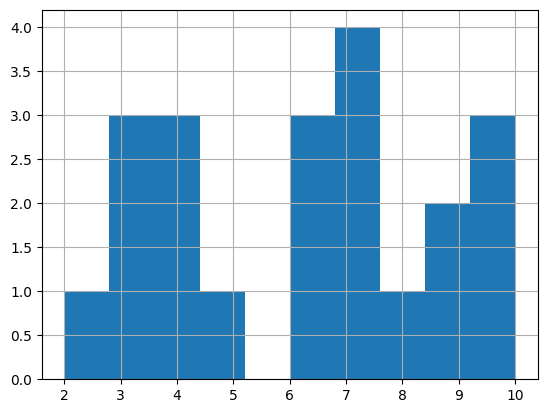

In [19]:
df["Sorting Time"].hist()

<Axes: >

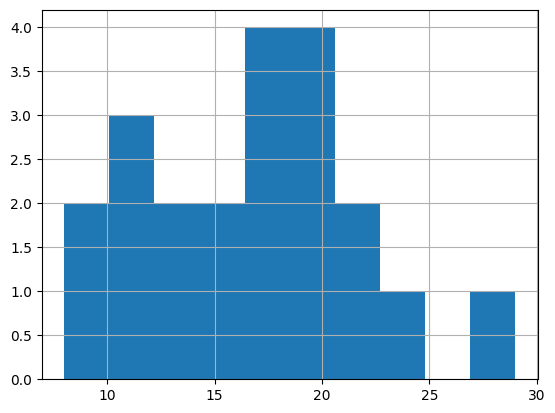

In [172]:
df["Delivery Time"].hist()

In [173]:
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


<Axes: >

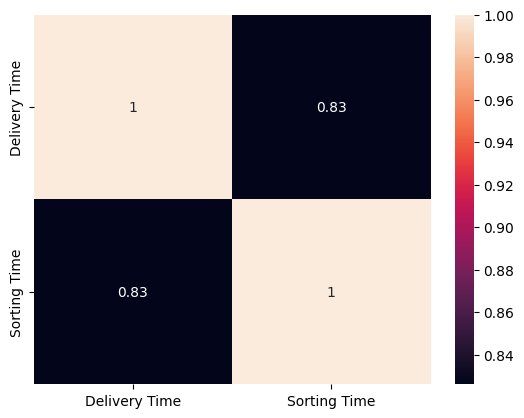

In [174]:
sns.heatmap(df.corr(),annot=True)

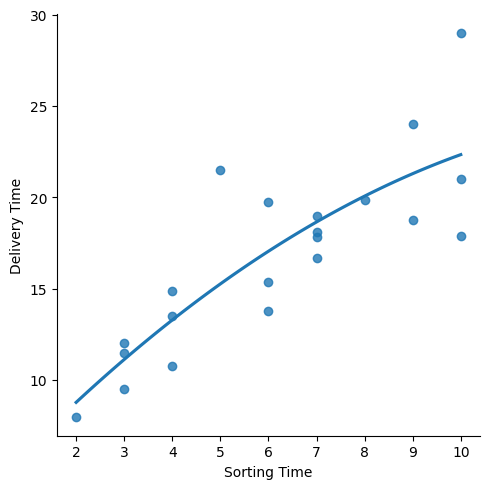

In [175]:

sns.lmplot(y="Delivery Time",x="Sorting Time",data=df,order = 2, ci = None)

In [181]:
from sklearn.model_selection import train_test_split
y=df["Delivery Time"]
X=df["Sorting Time"]
a,b,c,d=train_test_split(X,y,train_size=.8,random_state=1)
x_train=np.array(a).reshape(-1,1)
x_test=np.array(b).reshape(-1,1)
y_train=np.array(c).reshape(-1,1)
y_test=np.array(d).reshape(-1,1)

In [177]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)


In [182]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_train_pred=model.predict(x_train)
y_test_pred=model.predict(x_test)
tr=model.score(x_train,y_train)
ts=model.score(x_test,y_test)
print(f"Train accuracy : {tr}\nTest accracy : {ts}")

Train accuracy : 0.5989255285359077
Test accracy : 0.8811933445908059


In [179]:
from sklearn.metrics import r2_score
train_score=r2_score(y_train,y_train_pred)
test_score=r2_score(y_test,y_test_pred)

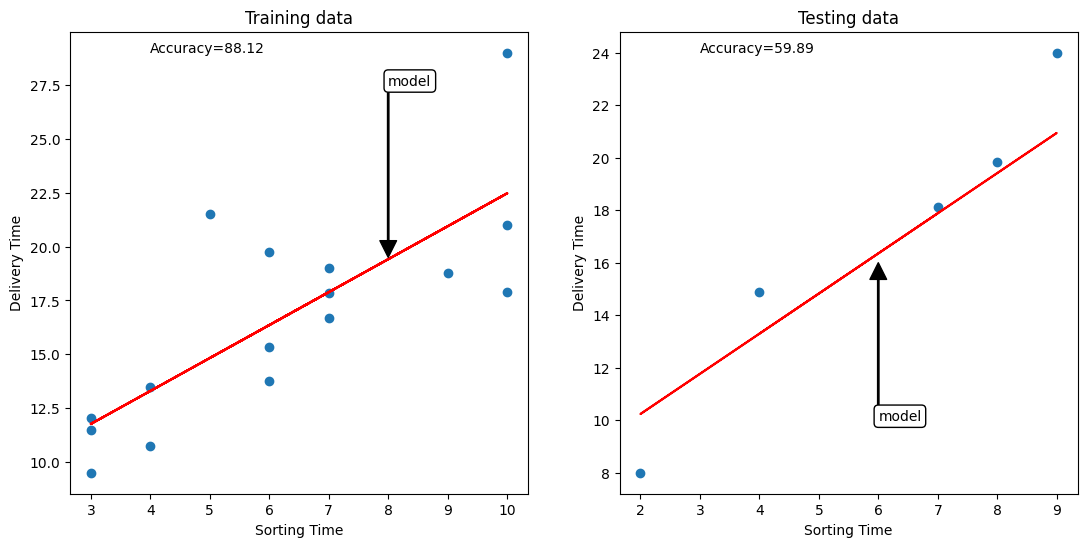

In [183]:
fig,ax=plt.subplots(figsize=(13,6))
plt.subplot(121)
plt.scatter(x_train,y_train)
plt.plot(x_train,y_train_pred,color="red")
plt.title("Training data")
plt.xlabel("Sorting Time")
plt.ylabel("Delivery Time")
plt.annotate("model",xytext=(8,27.5),xy=(8,19.5),arrowprops={"facecolor":"black","width":1},bbox={"boxstyle":"round","fc":"white"})
plt.text(4,29,f"Accuracy={round(ts,4)*100}")
plt.subplot(122)
plt.scatter(x_test,y_test)
plt.plot(x_test,y_test_pred,color="red")
plt.title("Testing data")
plt.annotate("model",xytext=(6,10),xy=(6,16),arrowprops={"facecolor":"black","width":1},bbox={"boxstyle":"round","fc":"white"})
plt.xlabel("Sorting Time")
plt.text(3,24,f"Accuracy={round(tr,4)*100}")
plt.ylabel("Delivery Time");



---
# **Prediction model for Salary_hike**


In [184]:
df=pd.read_csv("Salary_Data.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [ ]:
df.shape

(30, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [ ]:
df.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

<Axes: >

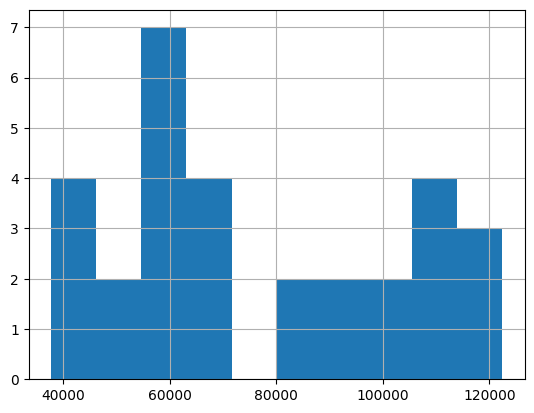

In [185]:
df["Salary"].hist()

<Axes: >

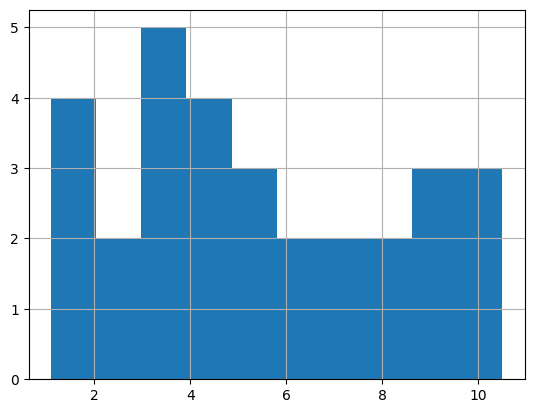

In [ ]:
df["YearsExperience"].hist()

<Axes: >

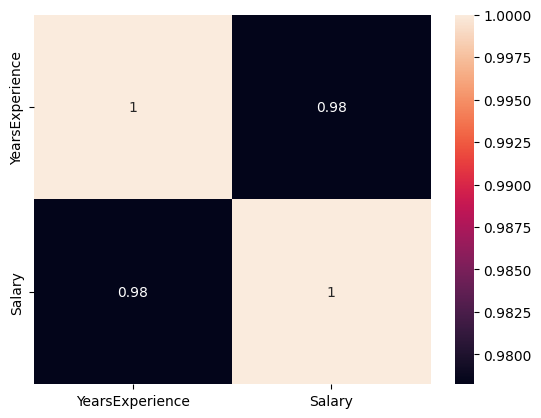

In [ ]:
sns.heatmap(df.corr(),annot=True)

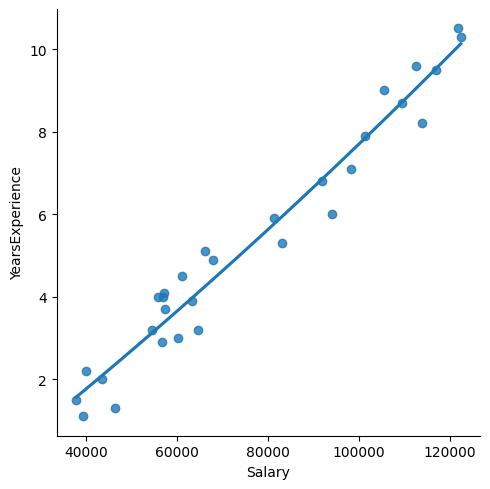

In [ ]:
sns.lmplot(x ="Salary", y ="YearsExperience", data = df, order = 2, ci = None)
plt.show()

In [126]:
from sklearn.model_selection import train_test_split
X=df.iloc[:,0]
y=df.iloc[:,1]
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)
x_train=x_train.values.reshape(-1,1)
y_train=y_train.values.reshape(-1,1)
x_test=x_test.values.reshape(-1,1)
y_test=y_test.values.reshape(-1,1)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train,y_train)
x_test=scaler.transform(x_test)

In [127]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [128]:
y_train_pred=model.predict(x_train)
y_test_pred=model.predict(x_test)
ts_acc=model.score(x_test,y_test)
tr_acc=model.score(x_train,y_train)
print("Training accuracy of the model : ",tr_acc*100,"\nTest accuracy of the model : ",ts_acc*100)

Training accuracy of the model :  96.45401573418147 
Test accuracy of the model :  90.24461774180497


In [129]:
from sklearn import metrics
ts=metrics.r2_score(y_test,y_test_pred)
tr=metrics.r2_score(y_train,y_train_pred)
print(f"Train accuracy : {tr}\nTest accuracy  : {ts}")

Train accuracy : 0.9645401573418146
Test accuracy  : 0.9024461774180497


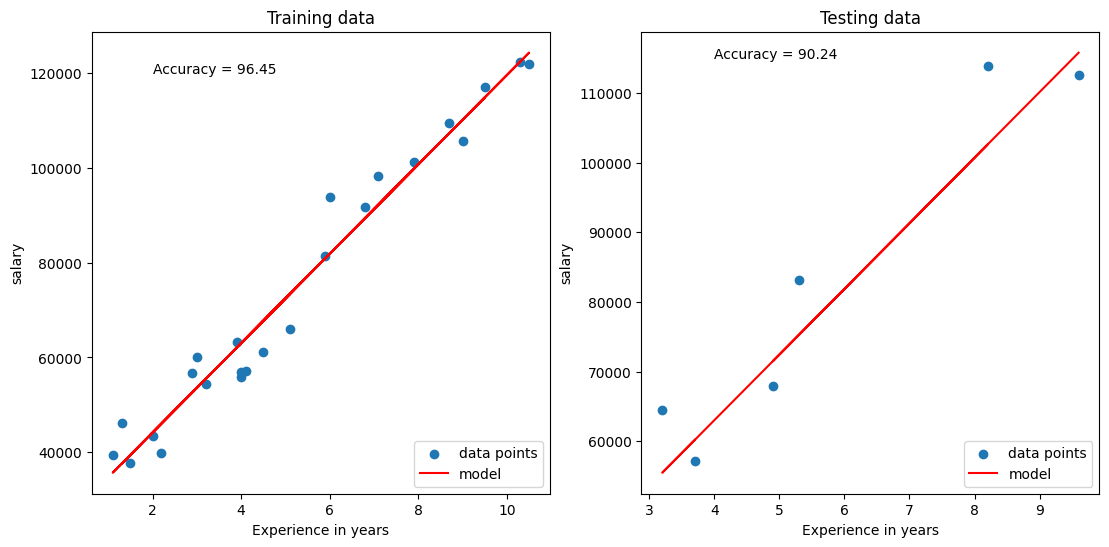

In [141]:
fig,ax=plt.subplots(figsize=(13,6))
plt.subplot(121)
plt.scatter(x_train,y_train)
plt.plot(x_train,y_train_pred,color="red")
plt.title("Training data")
plt.xlabel("Experience in years")
plt.ylabel("salary")
#plt.annotate("model",xytext=(9,80000),xy=(6,80000),arrowprops={"facecolor":"black","width":1},bbox={"boxstyle":"round","fc":"white"})
plt.text(2,120000,f"Accuracy = {round(tr,4)*100}")
plt.legend(["data points","model"],loc="lower right");
plt.subplot(122)
plt.scatter(x_test,y_test)
plt.plot(x_test,y_test_pred,color="red")
plt.title("Testing data")
#plt.annotate("model",xytext=(9,80000),xy=(6,80000),arrowprops={"facecolor":"black","width":1},bbox={"boxstyle":"round","fc":"white"})
plt.xlabel("Experience in years")
plt.text(4,115000,f"Accuracy = {round(ts,4)*100}")
plt.ylabel("salary")
plt.legend(["data points","model"],loc="lower right");



---

